In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Lise öğrencilerinin matematik başarıları ile ilgili bir veri seti kullandım. Yaş, Irksal köken, ebeveyn eğitim düzeyi, öğle yemeği tüketiminin ücretli olup olmaması, sınava hazırlık kursunu tamamlama derecesi, matematik skoru, Okuma skoru ve yazma skoru değişkenleri üzerinden değerlendirme yapılacak. 

In [2]:
df=pd.read_csv("../data/exams.csv")

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


array([[<Axes: title={'center': 'math score'}>]], dtype=object)

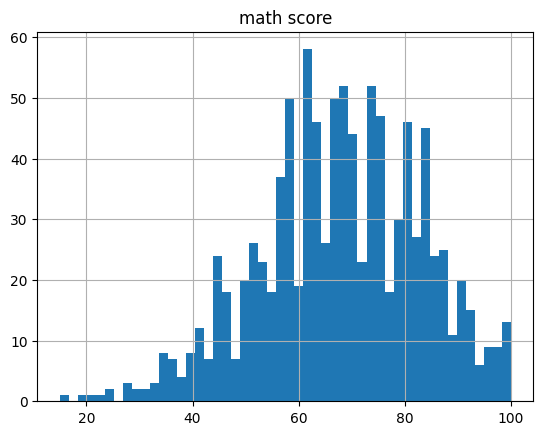

In [4]:
df.hist(column="math score", bins=50)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


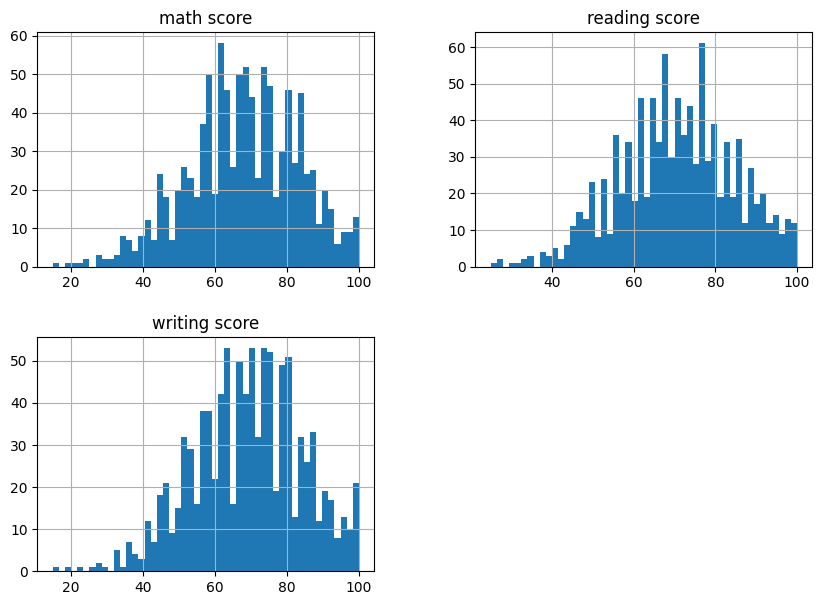

In [7]:
# Sayısal olan değerleri yazdırıyorum
df.hist(bins=50 ,figsize=(10,7))
plt.show()

Görselleştirme

<Figure size 1000x600 with 0 Axes>

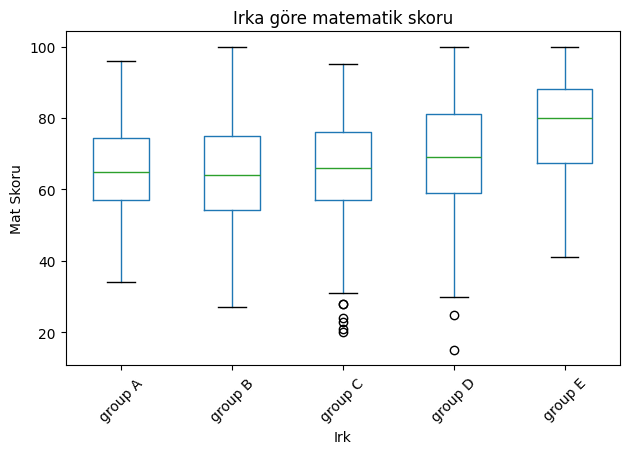

In [8]:

# 'race/ethnicity' ile 'math score' arasındaki ilişkiyi görselleştirme
# Kutu grafiği oluşturma
plt.figure(figsize=(10, 6))
box = df.boxplot(column='math score', by='race/ethnicity', grid=False)
plt.title('Irka göre matematik skoru')
plt.suptitle('')
plt.xlabel('Irk')
plt.ylabel('Mat Skoru')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

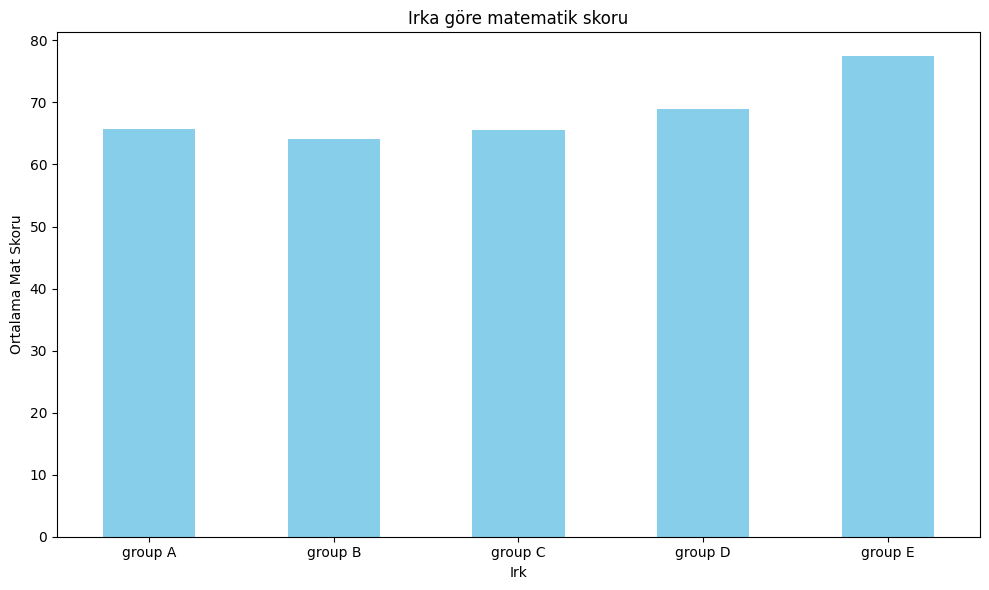

In [9]:
plt.figure(figsize=(10, 6))
df.groupby('race/ethnicity')['math score'].mean().plot(kind='bar', color='skyblue')
plt.title('Irka göre matematik skoru')
plt.xlabel('Irk')
plt.ylabel('Ortalama Mat Skoru')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

Grafiğe göre çok bir fark olmamakla beraber e grubundaki ırka sahip olanların matematik skorunun yüksek olduğu görülmüştür.

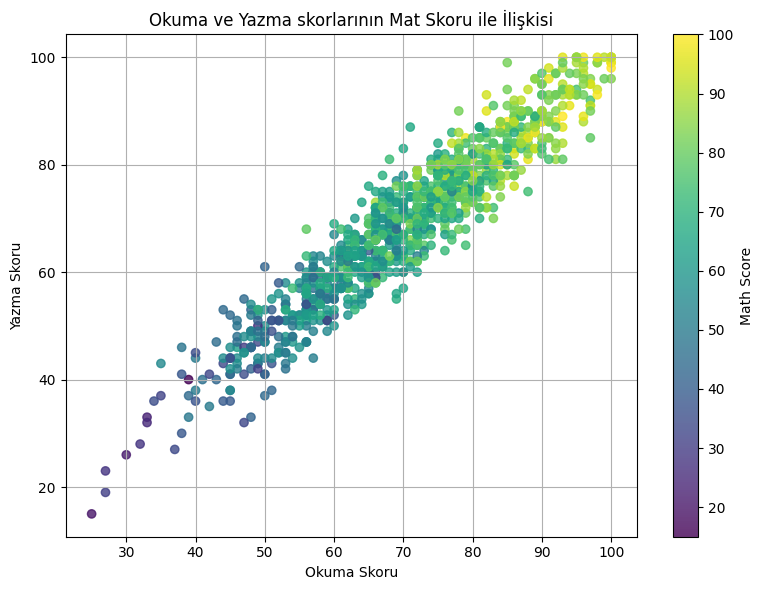

In [10]:
# Okuma ve yazma skoruna göre mat skoru değerini görselleştiriyorum (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(df['reading score'], df['writing score'], c=df['math score'], cmap='viridis', alpha=0.8)
plt.colorbar(label='Math Score')
plt.title('Okuma ve Yazma skorlarının Mat Skoru ile İlişkisi')
plt.xlabel('Okuma Skoru')
plt.ylabel('Yazma Skoru')
plt.grid(True)
plt.tight_layout()

plt.show()

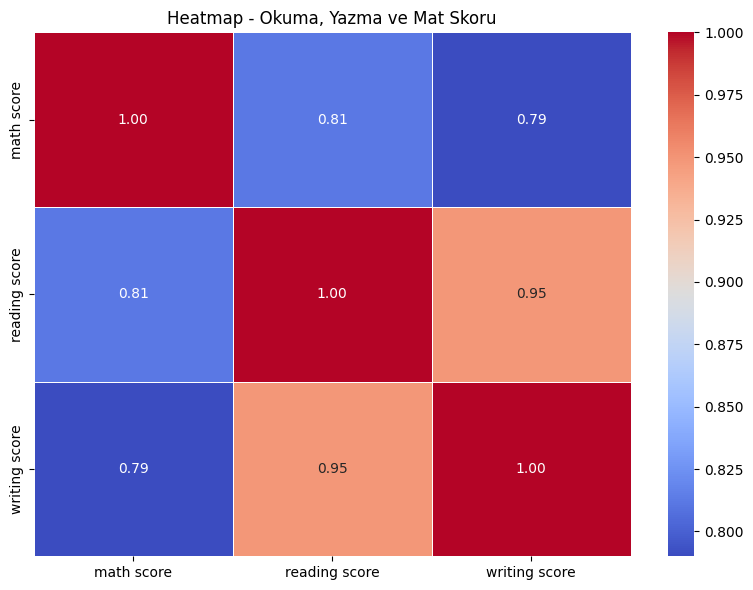

In [11]:
# Okuma ve yazma skoruna göre mat skoru değerini görselleştiriyorum (heatmap)
plt.figure(figsize=(8, 6))
heatmap_data = df[['math score', 'reading score', 'writing score']]
heatmap = sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap - Okuma, Yazma ve Mat Skoru')
plt.tight_layout()

plt.show()

Yaptığımız görsellemelere göre okuma ve yazma skoru yüksek olanların genel olarak matematik skorunun da iyi olduğu görülmekte.

C:\Users\sevgi\AppData\Local\Temp\ipykernel_6232\1342118166.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='parental level of education', y='math score', data=df, ci=None)


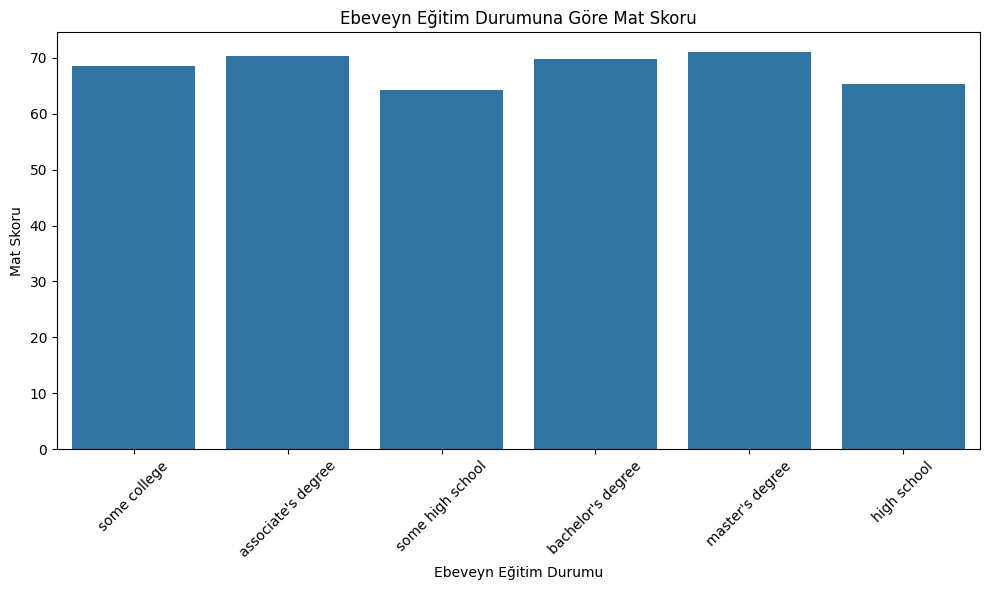

In [12]:
#Öğrenci ailelerinin eğitim durumunun göre math skorunun nasıl bir etkisi var bunu gözlemlemek istiyorum. (barplot)
plt.figure(figsize=(10, 6))
sns.barplot(x='parental level of education', y='math score', data=df, ci=None)
plt.title('Ebeveyn Eğitim Durumuna Göre Mat Skoru')
plt.xlabel('Ebeveyn Eğitim Durumu')
plt.ylabel('Mat Skoru')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


C:\Users\sevgi\AppData\Local\Temp\ipykernel_6232\2357912147.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='parental level of education', y='math score', data=df, palette='viridis')


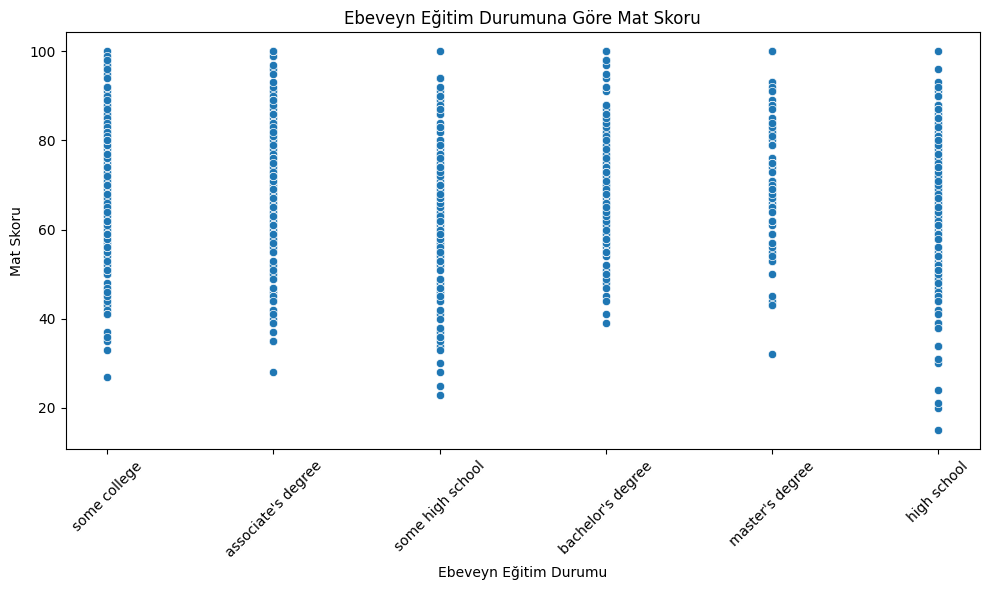

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='parental level of education', y='math score', data=df, palette='viridis')
plt.title('Ebeveyn Eğitim Durumuna Göre Mat Skoru')
plt.xlabel('Ebeveyn Eğitim Durumu')
plt.ylabel('Mat Skoru')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Ailesinin eğitim düzeyinin yüksek olmasının da mat skorlarında olumlu bir etkisi olduğu gözlemlenmekte.

In [15]:
#Proprocessing İşlemine Başlıyorum
#Buradaki amacım hepsini sayısal veriye çevirerek gözlemleme
for c in df.columns:
    if df[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)




- gender 0:female  1:male
- ethnicity  0:A 1:B 2:C 3D: 4:E
- parental level of Education 0:associates 1:bachelor 2:high school 3:master 4:some college 5:high school
- lunch 0:standart 1:free/reduced
- test preparation course 0:completed 1:none


In [16]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,59,70,78
1,1,3,0,1,1,96,93,87
2,0,3,4,0,1,57,76,77
3,1,1,4,0,1,70,70,63
4,0,3,0,1,1,83,85,86
5,1,2,5,1,1,68,57,54
6,0,4,0,1,1,82,83,80
7,0,1,5,1,1,46,61,58
8,1,2,5,1,1,80,75,73
9,0,2,1,1,0,57,69,77


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [18]:
col = 'math score'
X = df.drop([col], axis=1)
y = df[col]

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [19]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [20]:
#Normalizasyona başladım
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [21]:
#Decision model oluşturdum ve eğitme işlemi yaptım
decision = DecisionTreeRegressor(max_depth=3)
decision.fit(X_train, y_train)

#Eğitilmiş DecisionTreeRegressor modelini kullanarak test veri seti üstünde tahminler yapıldı
y_pred_decision = decision.predict(X_test)

In [22]:
#KNN regressor oluştırdum ve eğitme işlemi yaptım
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

#KNeighborsRegressor modeli ile test veri seti üzerinde tahminler yapıldı
y_pred_knn = knn.predict(X_test)

In [23]:
#DecisionTree'ye göre performans metriklerini kullandım
mse_decision = mean_squared_error(y_test, y_pred_decision)
r2_decision = r2_score(y_test, y_pred_decision)
mae_decision = mean_absolute_error(y_test, y_pred_decision)

#KNN'e göre performans metriklerini kullandım
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)



In [24]:

print("Decision Tree Regressor:")
print("Mean Squared Error:", mse_decision)
print("R² Score:", r2_decision)
print("Mean Absolute Error:", mae_decision)

print("\nK-Nearest Neighbors Regressor:")
print("Mean Squared Error:", mse_knn)
print("R² Score:", r2_knn)
print("Mean Absolute Error:", mae_knn)

Decision Tree Regressor:
Mean Squared Error: 63.48706422962358
R² Score: 0.7098264809652015
Mean Absolute Error: 6.360497447588687

K-Nearest Neighbors Regressor:
Mean Squared Error: 49.744
R² Score: 0.7726404314639609
Mean Absolute Error: 5.327999999999999


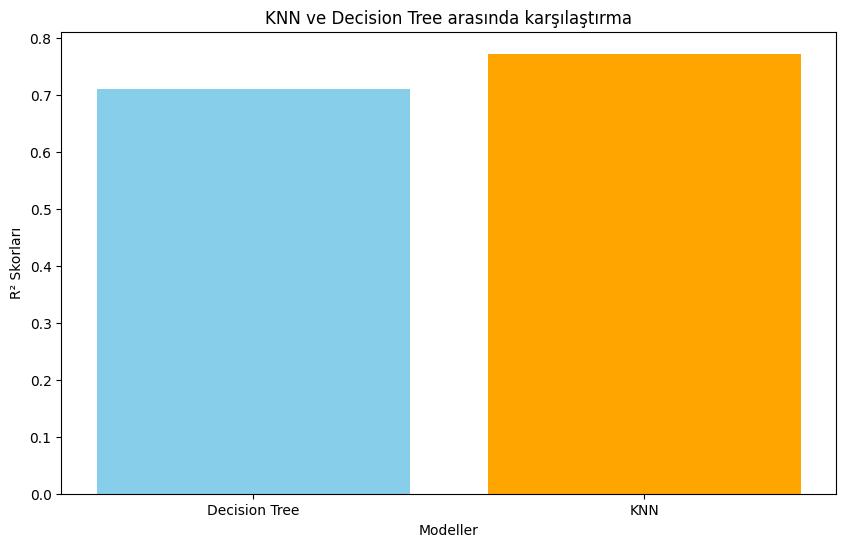

In [29]:
#R2 skorları görselleştirmek istiyorum
r2_values = [r2_decision, r2_knn]
models = ['Decision Tree', 'KNN']

plt.figure(figsize=(10, 6))

plt.bar(models, r2_values, color=['skyblue', 'orange'])
plt.xlabel('Modeller')
plt.ylabel('R² Skorları')
plt.title('KNN ve Decision Tree arasında karşılaştırma')

plt.show()

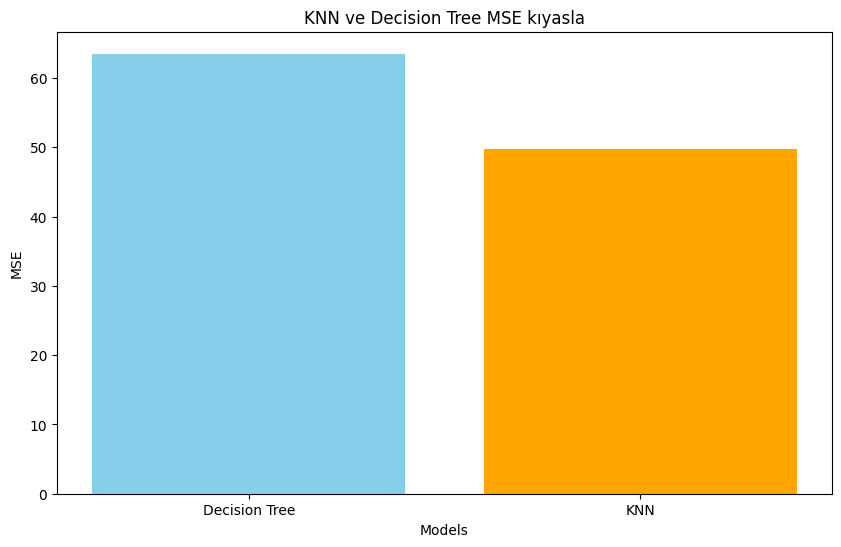

In [30]:
mse_values = [mse_decision, mse_knn]

models = ['Decision Tree', 'KNN']

plt.figure(figsize=(10, 6))

plt.bar(models, mse_values, color=['skyblue', 'orange'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('KNN ve Decision Tree MSE kıyasla')

plt.show()

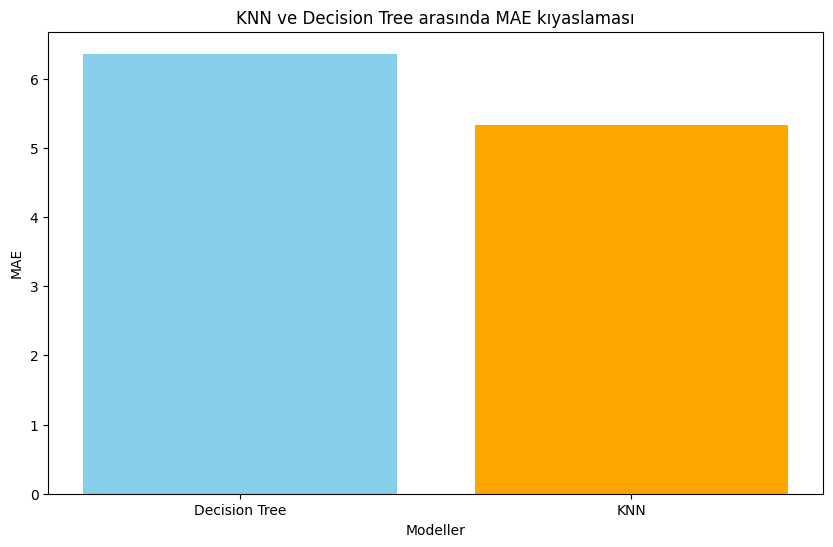

In [31]:

mae_values = [mae_decision, mae_knn]

models = ['Decision Tree', 'KNN']

plt.figure(figsize=(10, 6))

plt.bar(models, mae_values, color=['skyblue', 'orange'])
plt.xlabel('Modeller')
plt.ylabel('MAE')
plt.title('KNN ve Decision Tree arasında MAE kıyaslaması')

plt.show()


KNN'in Decision Tree'ye göre daha iyi bir performans sergilediği görülmüştür.